# Logistic regression

### Mateusz Lęcznar 406370 grupa śr. 18.15

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
path = os.getcwd() + '/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

In [2]:
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
X = data.values[:, :2].T
y = data.values[:, 2:].T

In [4]:
theta = np.zeros((X.shape[0]+1, 1))

In [5]:
X = np.concatenate([np.ones([1, X.shape[1]]), X])

In [6]:
for i in range(1, X.shape[0]):
    X[i, :] = (X[i, :] - np.mean(X[i, :])) / (np.std(X[i, :]))

<AxesSubplot: xlabel='Exam 1', ylabel='Exam 2'>

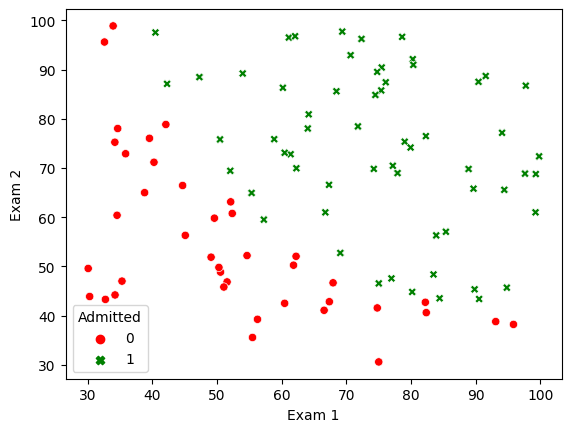

In [7]:
sns.scatterplot(data=data, x="Exam 1", y="Exam 2",hue="Admitted",style="Admitted",palette=["red","green"])

<IPython.core.display.Javascript object>


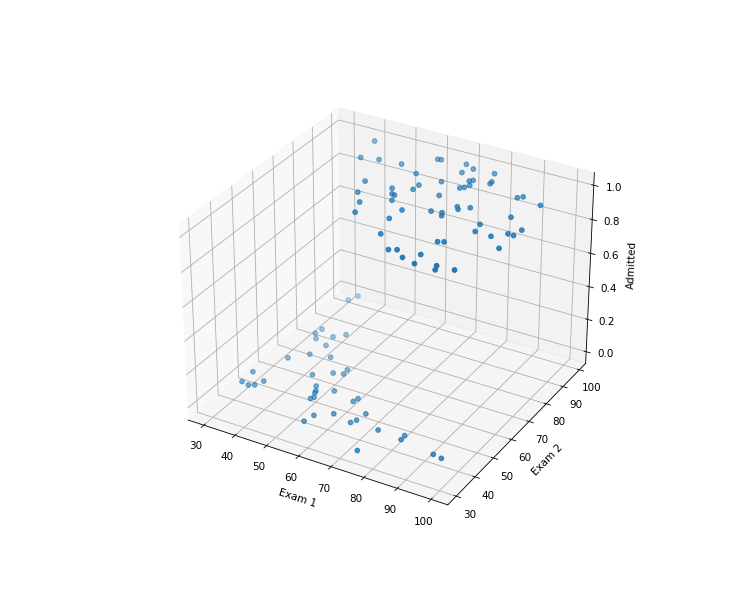

Text(0.5, 0, 'Admitted')

In [8]:
%matplotlib notebook
plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
fg = ax.scatter3D(data['Exam 1'],data['Exam 2'],data['Admitted'])
ax.set_xlabel ('Exam 1')
ax.set_ylabel ('Exam 2')
ax.set_zlabel ('Admitted')

In [9]:
#t=theta.T@X
def sig(t):
    t=t.astype(float)
    return 1/(1+np.exp(-t))
#sig(t)


<IPython.core.display.Javascript object>


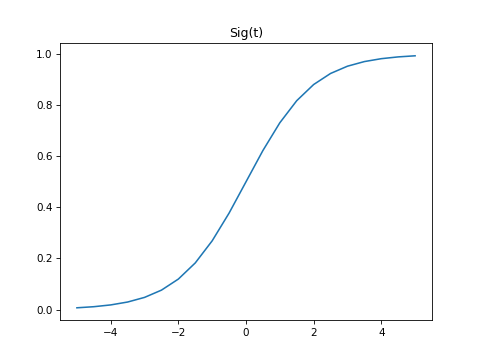

<function matplotlib.pyplot.show(*, block=None)>

In [10]:
def linspace(start, stop, step=1.):
  """
    Like np.linspace but uses step instead of num
    This is inclusive to stop, so if start=1, stop=3, step=0.5
    Output is: array([1., 1.5, 2., 2.5, 3.])
  """
  return np.linspace(start, stop, int((stop - start) / step + 1))

cor_opt = list(linspace(-5,5,0.5))
cor_opt_y = []
for i in cor_opt:
    cor_opt_y.append(sig(i))

plt.figure()
plt.plot(cor_opt,cor_opt_y)
plt.title("Sig(t)")
plt.show

## Cost function for logistic regression

In [11]:
theta = np.zeros((X.shape[0], 1))

def cost(theta, X, y):
    
    h_theta = sig(theta.T@X)
    cost_list = []
    for index, item in enumerate(y[0]):

        if item == 1:
            cost_list.append(-np.log(h_theta[0][index]))

        if item == 0:

            cost_list.append(-np.log(1-h_theta[0][index]))
            
        if item != 1 and item != 0:
            cost_list.append(-item*np.log(h_theta[0][index])-(1-y)*np.log(1-h_theta[0][index]))

    return np.sum(cost_list)/len(y[0])

cost(theta,X,y)

0.6931471805599453

## Simple gradient method

In [12]:
alpha = 1
it = 150
theta = np.zeros((X.shape[0], 1))
coste =[]
def simple_gradient(X, y, theta, alpha, it):
    # it - number of iterations
    for i in range(it):
        m=len(y[0])
        t=theta.T@X
        
        t1=theta[0]-alpha*(np.sum((sig(t)-y)@X[0][:])/m)
        t2=theta[1]-alpha*(np.sum((sig(t)-y)@X[1][:])/m)
        t3=theta[2]-alpha*(np.sum((sig(t)-y)@X[2][:])/m)
        
        theta = np.array([t1,t2,t3])
 
    return theta,cost(theta,X,y)

theta,coste =simple_gradient(X,y,theta,alpha,it)

In [13]:
theta

array([[1.41957362],
       [3.35941597],
       [3.11271333]])

In [14]:
line=[]
for i in range(len(y[0])):
    line.append(float(sig(X[0][i]*theta[0]+X[1][i]*theta[1]+X[2][i]*theta[2])))
list_predicted = [i for i in line if i >= 0.5]
print(len(list_predicted),"/",len(line))
print("Skuteczność :", 100*len(list_predicted)/len(line),"%")

61 / 100
Skuteczność : 61.0 %


<IPython.core.display.Javascript object>


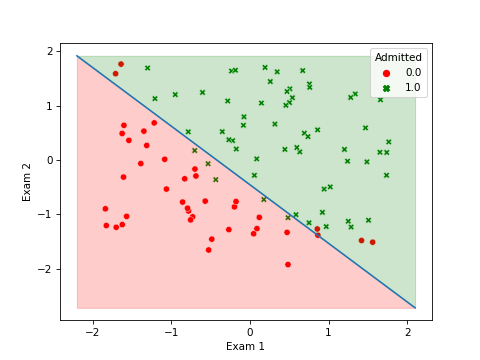

In [15]:
plt.figure()
x1 = np.arange(-2.2, 2.2, 0.1)
x2 = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0] * x1
plt.plot(x1, x2)
data_plot=pd.DataFrame(data=[X[1].T,X[2].T,y[0].T]).T
data_plot.columns=['Exam 1', 'Exam 2', 'Admitted']
sns.scatterplot(data=data_plot,x="Exam 1", y="Exam 2",hue="Admitted",style="Admitted",palette=["red","green"])
plt.fill_between(x1, x2, max(x2),color='green', alpha=0.2)
plt.fill_between(x1, x2, min(x2), color='red',alpha=0.2)

## Multi-class logistic regression

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
 
iris = datasets.load_iris()
X = iris.data[:, :2]  # we are analyzing only 2 parameters
Y = iris.target


<IPython.core.display.Javascript object>


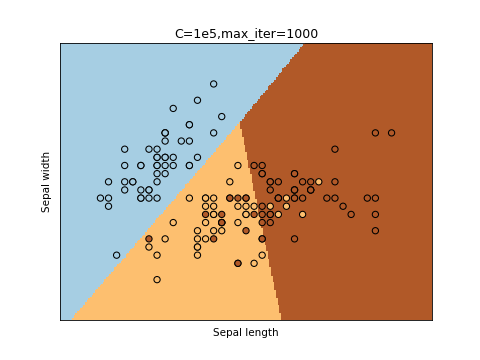

/home/mateusz/Pliki_python/Pliki_python/envs/mateuszlecznar/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


<IPython.core.display.Javascript object>


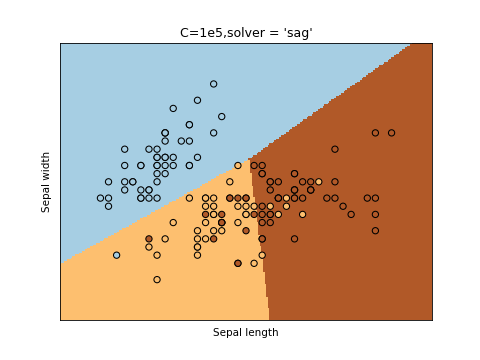

<IPython.core.display.Javascript object>


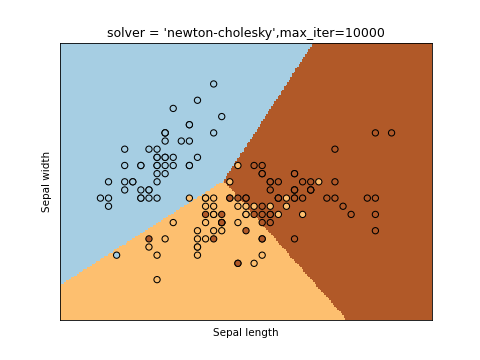

LogisticRegression(C=1e5,max_iter=1000) :
 
 [[1. 0. 0.]
 [1. 0. 0.]] 

LogisticRegression(C=1e5,solver = 'sag') :
 
 [[0.99663 0.00273 0.00063]
 [0.86573 0.11589 0.01838]] 

LogisticRegression(solver = 'newton-cholesky',max_iter=10000) :
 
 [[0.84358 0.11125 0.04517]
 [0.69397 0.27009 0.03594]] 



In [17]:
def logreg_fun(logreg,title):
    logreg.fit(X, Y)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.figure()
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(title)
    plt.show()
    
np.set_printoptions(precision=5)
np.set_printoptions(suppress=True)

logreg1 = LogisticRegression(C=1e5,max_iter=1000)
title="C=1e5,max_iter=1000"
logreg_fun(logreg1,title)

logreg2 = LogisticRegression(C=1e5,solver = 'sag')
title = "C=1e5,solver = 'sag'"
logreg_fun(logreg2,title)

logreg3 = LogisticRegression(solver = 'newton-cholesky',max_iter=10000)
title = "solver = 'newton-cholesky',max_iter=10000"
logreg_fun(logreg3,title)

print("LogisticRegression(C=1e5,max_iter=1000) :\n","\n",logreg1.predict_proba(X[:2]),"\n")
print("LogisticRegression(C=1e5,solver = 'sag') :\n","\n",logreg2.predict_proba(X[:2]),"\n")
print("LogisticRegression(solver = 'newton-cholesky',max_iter=10000) :\n","\n",logreg3.predict_proba(X[:2]),"\n")

## Evaluation

The best result is with parametrs C=1e5,max_iter=1000
Algoritm chosed the type of flower well.